<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory data analysis</a></span></li><li><span><a href="#Plot-time-series-data" data-toc-modified-id="Plot-time-series-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot time series data</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data pre-processing</a></span></li><li><span><a href="#Building-time-series-model" data-toc-modified-id="Building-time-series-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Building time series model</a></span></li><li><span><a href="#Finding-ARIMA-model-parameters" data-toc-modified-id="Finding-ARIMA-model-parameters-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Finding ARIMA model parameters</a></span><ul class="toc-item"><li><span><a href="#ARIMA-model" data-toc-modified-id="ARIMA-model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>ARIMA model</a></span></li><li><span><a href="#Forecasting" data-toc-modified-id="Forecasting-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Forecasting</a></span></li></ul></li><li><span><a href="#Building-time-series-model(Covid-19-and-beds)" data-toc-modified-id="Building-time-series-model(Covid-19-and-beds)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Building time series model(Covid-19 and beds)</a></span><ul class="toc-item"><li><span><a href="#Finding-ARIMA-model-parameters" data-toc-modified-id="Finding-ARIMA-model-parameters-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Finding ARIMA model parameters</a></span></li><li><span><a href="#Building-ARIMA-model" data-toc-modified-id="Building-ARIMA-model-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Building ARIMA model</a></span></li></ul></li><li><span><a href="#Visualization-in-Plotly" data-toc-modified-id="Visualization-in-Plotly-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Visualization in Plotly</a></span></li></ul></div>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

## Read data

In [81]:
df1 = pd.read_csv('countries_beds.csv')

In [349]:
df2 = pd.read_csv('COVID.csv')

In [82]:
df1.head(5)

Year  UnitedStates  France  Italy  Australia  Spain  China
0  1960           9.2    10.0    8.9       11.2    4.4    1.2
1  1961           9.2    10.0    9.0       11.3    4.4    1.2
2  1962           9.1    10.0    9.2       11.4    4.4    1.2
3  1963           9.0    10.0    9.3       11.7    4.4    1.4
4  1964           8.9    10.0    9.5       11.8    4.6    1.4

In [258]:
df2.head()

dateRep  day  month  year  cases  Cm_cases  deaths  \
0  1/21/2020   21      1  2020      1         1       0   
1  1/22/2020   22      1  2020      0         1       0   
2  1/23/2020   23      1  2020      0         1       0   
3  1/24/2020   24      1  2020      0         1       0   
4  1/25/2020   25      1  2020      1         2       0   

    countriesAndTerritories geoId countryterritoryCode  popData2018    beds  
0  United_States_of_America    US                  USA    327167434  981502  
1  United_States_of_America    US                  USA    327167434  981502  
2  United_States_of_America    US                  USA    327167434  981502  
3  United_States_of_America    US                  USA    327167434  981502  
4  United_States_of_America    US                  USA    327167434  981502

## Exploratory data analysis

In [83]:
df1.describe()

Year  UnitedStates     France      Italy  Australia      Spain  \
count    53.000000     53.000000  53.000000  53.000000  53.000000  53.000000   
mean   1986.000000      5.573585   9.407547   7.516981   9.296415   4.375472   
std      15.443445      2.046305   1.378105   2.508350   3.091944   0.675080   
min    1960.000000      2.900000   6.500000   3.400000   3.800000   3.000000   
25%    1973.000000      3.600000   8.300000   4.900000   7.900000   4.100000   
50%    1986.000000      5.400000  10.000000   8.000000  10.500000   4.600000   
75%    1999.000000      7.200000  10.500000   9.700000  11.800000   4.700000   
max    2012.000000      9.200000  11.100000  10.600000  12.300000   5.500000   

           China  
count  53.000000  
mean    2.279811  
std     0.690937  
min     1.200000  
25%     1.770000  
50%     2.290000  
75%     2.550000  
max     4.200000

In [259]:
df2.describe()

day      month    year         cases       Cm_cases       deaths  \
count  75.000000  75.000000    75.0     75.000000      75.000000    75.000000   
mean   16.360000   2.373333  2020.0   3706.200000   24753.106667    95.426667   
std     9.352901   0.801575     0.0   7912.679672   60258.331972   246.103481   
min     1.000000   1.000000  2020.0      0.000000       1.000000     0.000000   
25%     8.000000   2.000000  2020.0      0.000000      12.000000     0.000000   
50%    17.000000   2.000000  2020.0      6.000000      59.000000     0.000000   
75%    24.500000   3.000000  2020.0    855.000000    4217.500000    11.000000   
max    31.000000   4.000000  2020.0  32425.000000  277965.000000  1104.000000   

       popData2018      beds  
count         75.0      75.0  
mean   327167434.0  981502.0  
std            0.0       0.0  
min    327167434.0  981502.0  
25%    327167434.0  981502.0  
50%    327167434.0  981502.0  
75%    327167434.0  981502.0  
max    327167434.0  981502.0

In [175]:
df1.shape

(53, 7)

In [260]:
df2.shape

(75, 12)

In [85]:
# manually filled in NA - since this is just a prototype
# otherwise we could have simply imputed the the missing values using movingn average values

df1.isnull().sum()

Year            0
UnitedStates    0
France          0
Italy           0
Australia       0
Spain           0
China           0
dtype: int64

In [261]:
df2.isnull().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
Cm_cases                   0
deaths                     0
countriesAndTerritories    0
geoId                      0
countryterritoryCode       0
popData2018                0
beds                       0
dtype: int64

In [86]:
#Countries with most bed capacity entries - checked manually - and dataset altered

list_countries = ['Australia', 'Italy', 'China', 'Spain', 'France', 'UnitedStates']

countries_df = df1.copy()


    Year  UnitedStates  France  Italy  Australia  Spain  China
0   1960           9.2    10.0    8.9      11.20    4.4   1.20
1   1961           9.2    10.0    9.0      11.30    4.4   1.20
2   1962           9.1    10.0    9.2      11.40    4.4   1.20
3   1963           9.0    10.0    9.3      11.70    4.4   1.40
4   1964           8.9    10.0    9.5      11.80    4.6   1.40
5   1965           8.8    10.1    9.6      11.90    4.7   1.44
6   1966           8.5    10.1    9.7      11.80    4.7   1.52
7   1967           8.3    10.2    9.9      11.80    4.7   1.50
8   1968           8.1    10.2   10.1      11.80    4.7   1.45
9   1969           8.0    10.2   10.3      11.70    4.7   1.45
10  1970           7.9    10.5   10.6      11.70    4.7   1.54
11  1971           7.5    10.5   10.6      11.60    4.7   1.58
12  1972           7.4    10.5   10.6      11.80    4.7   1.71
13  1973           7.2    10.5   10.5      11.80    4.7   1.77
14  1974           7.1    10.5   10.6      12.00    4.7

## Plot time series data

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

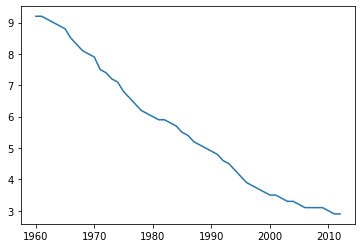

In [94]:
plt.plot(df1['Year'], df1['UnitedStates'])

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')


## Data pre-processing

In [97]:
# model to predict the 2020 hospital beds/1000 people 
import datetime as dt
import statsmodels


In [100]:
n = len(df2)

for i in range(n):
    t = df2.iloc[i]
    t['dateRep'] = dt.datetime.strptime(t['dateRep'], '%m/%d/%Y')
    

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8704 entries, 0 to 8703
Data columns (total 10 columns):
dateRep                    8704 non-null object
day                        8704 non-null int64
month                      8704 non-null int64
year                       8704 non-null int64
cases                      8704 non-null int64
deaths                     8704 non-null int64
countriesAndTerritories    8704 non-null object
geoId                      8683 non-null object
countryterritoryCode       8626 non-null object
popData2018                8676 non-null float64
dtypes: float64(1), int64(5), object(4)
memory usage: 680.1+ KB


In [105]:
df2['dateRep'] = df2['dateRep'].astype('datetime64[ns]')
df2.dtypes

dateRep                    datetime64[ns]
day                                 int64
month                               int64
year                                int64
cases                               int64
deaths                              int64
countriesAndTerritories            object
geoId                              object
countryterritoryCode               object
popData2018                       float64
dtype: object

In [106]:
# getting data of the 5 countries

cities1 = ['Australia', 'China', 'France', 'Iran', 'Spain', 'United_States_of_America']

cities_df = df2.loc[df2['countriesAndTerritories'].isin(cities1)]

In [108]:
cities_df.shape

(576, 10)

In [217]:
df2['net_cases'] = abs(df2['cases'] - df2['deaths'])

In [218]:
df2.head()

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0   4/4/2020    4      4  2020    324       7               Australia    AU   
1   4/3/2020    3      4  2020    248       2               Australia    AU   
2   4/2/2020    2      4  2020    269       1               Australia    AU   
3   4/1/2020    1      4  2020    150       1               Australia    AU   
4  3/31/2020   31      3  2020    464       3               Australia    AU   

  countryterritoryCode  popData2018   beds  net_cases  
0                  AUS     24992369  94971        317  
1                  AUS     24992369  94971        246  
2                  AUS     24992369  94971        268  
3                  AUS     24992369  94971        149  
4                  AUS     24992369  94971        461

## Building time series model

## Finding ARIMA model parameters

In [113]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

#checking for UnitedStates
result = adfuller(df1['UnitedStates'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# we see that the p-value is lower than 0.05 and hence we don't difference the time series data

ADF Statistic: -2.890702
p-value: 0.046440


In [114]:
#checking for China
result = adfuller(df1['China'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# p-value is higher than 0.05 and hence we need to find how many times we need to difference 

ADF Statistic: -0.083571
p-value: 0.951051


In [116]:
#checking for Spain
result = adfuller(df1['Spain'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.461674
p-value: 0.983660


In [117]:
#checking for Italy
result = adfuller(df1['Italy'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.333031
p-value: 0.920694


In [118]:
#checking for France
result = adfuller(df1['France'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.117919
p-value: 0.967263


In [119]:
#checking for Australia
result = adfuller(df1['Australia'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.566207
p-value: 0.986752


In [120]:
# importing libraries for plotting acf, pacf plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


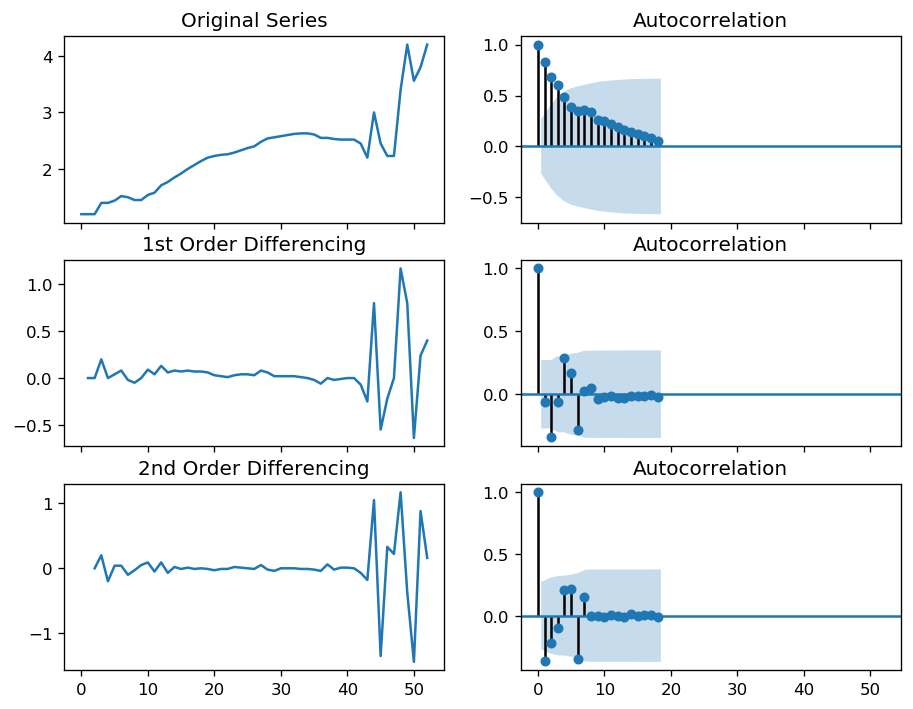

In [122]:
# differencing China

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1['China']); axes[0, 0].set_title('Original Series')
plot_acf(df1['China'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df1['China'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1['China'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df1['China'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1['China'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

# difference - 1

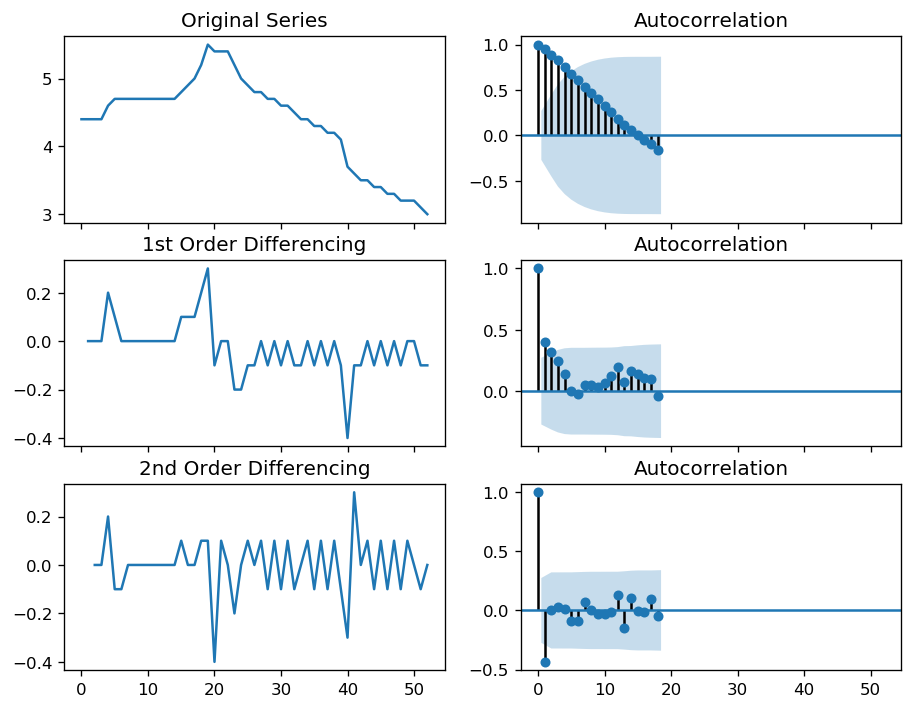

In [129]:
# differencing Spain

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1['Spain']); axes[0, 0].set_title('Original Series')
plot_acf(df1['Spain'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df1['Spain'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1['Spain'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df1['Spain'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1['Spain'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

# difference - 1

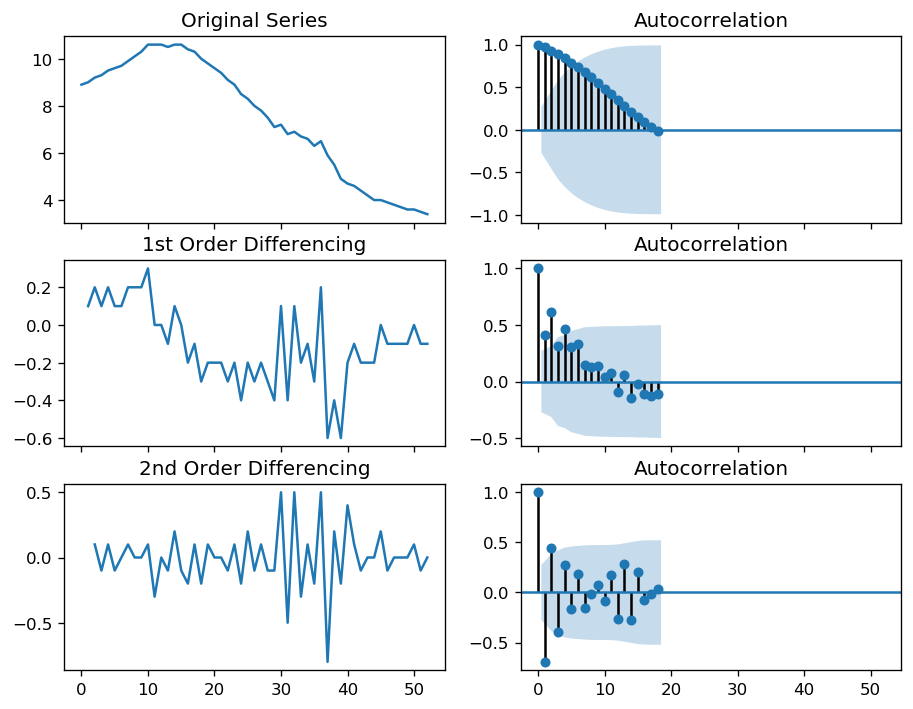

In [126]:
# differencing Italy

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1['Italy']); axes[0, 0].set_title('Original Series')
plot_acf(df1['Italy'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df1['Italy'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1['Italy'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df1['Italy'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1['Italy'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

## difference - 1

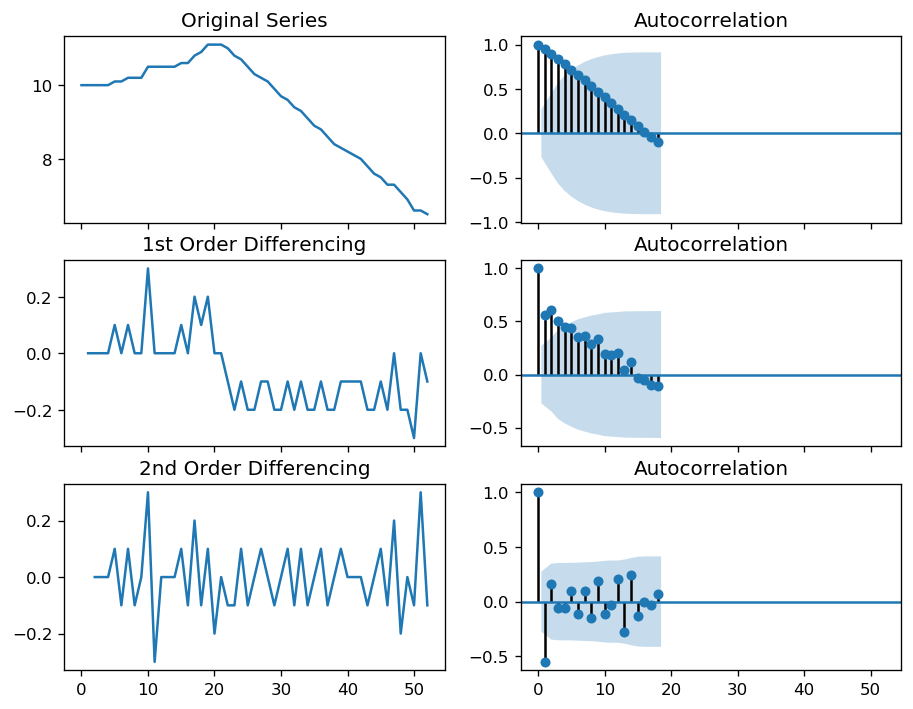

In [130]:
# differencing France

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1['France']); axes[0, 0].set_title('Original Series')
plot_acf(df1['France'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df1['France'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1['France'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df1['France'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1['France'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

## difference - 1

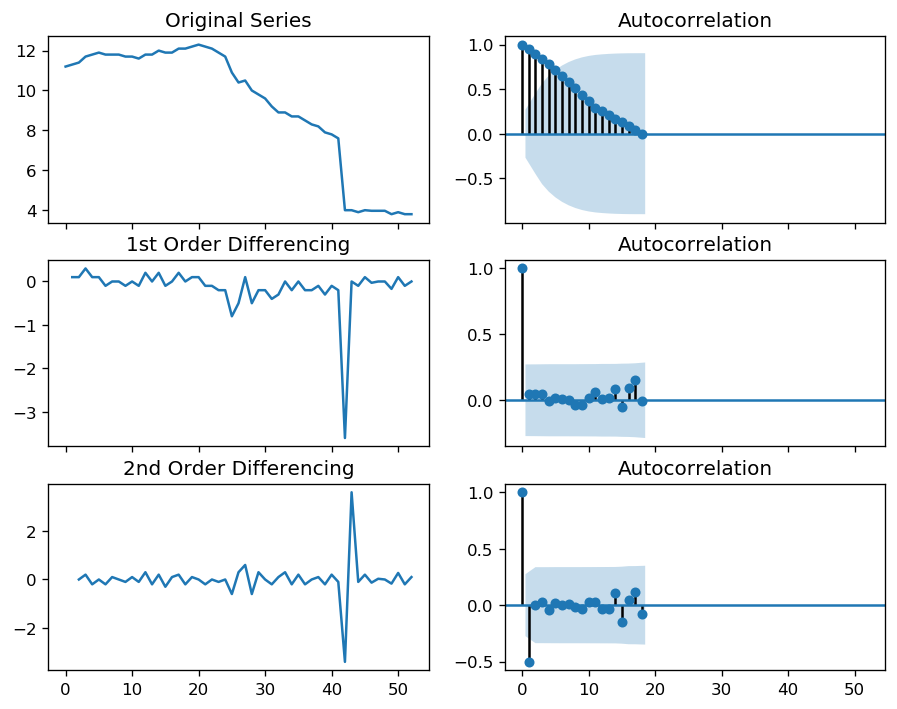

In [131]:
# differencing Australia

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1['Australia']); axes[0, 0].set_title('Original Series')
plot_acf(df1['Australia'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df1['Australia'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1['Australia'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df1['Australia'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1['Australia'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

## difference - 1

In [140]:
# Hence we carry out 1 differencing for each variable and carry out modeling

import pmdarima
from pmdarima import ndiffs

test_diff = []

for y in list_countries:
    ## Adf Test
    test_diff.append([ndiffs(df[y], test='adf'), ndiffs(df[y], test='kpss'), ndiffs(y, test='pp')]) 

print(test_diff)

ModuleNotFoundError: No module named 'pmdarima'

In [142]:
from statsmodels.tsa.arima_model import ARIMA
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})


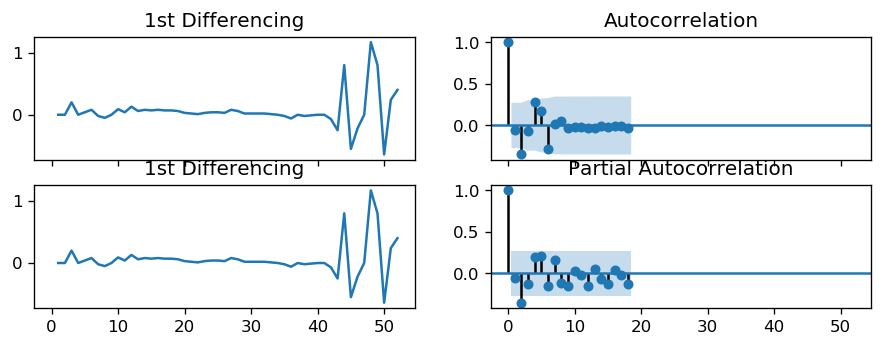

In [151]:
from statsmodels.tsa.arima_model import ARIMA
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

#pacf plot to get values of p,q for ARIMA model

# China acf 
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0,0].plot(df1['China'].diff()); axes[0,0].set_title('1st Differencing')
plot_acf(df1['China'].diff().dropna(), ax=axes[0,1])

# China pacf
axes[1,0].plot(df1['China'].diff()); axes[1,0].set_title('1st Differencing')
plot_pacf(df1['China'].diff().dropna(), ax=axes[1,1])

plt.show()

# hence p, q values for models
# p = 1; q = 1

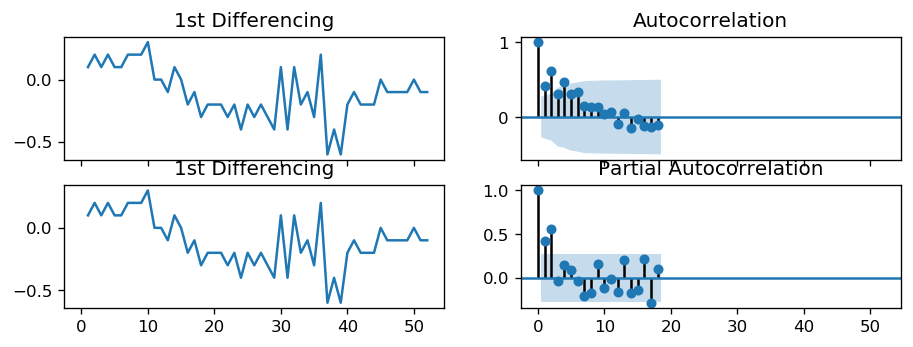

In [152]:
# Italy acf 
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0,0].plot(df1['Italy'].diff()); axes[0,0].set_title('1st Differencing')
plot_acf(df1['Italy'].diff().dropna(), ax=axes[0,1])

# Italy pacf
axes[1,0].plot(df1['Italy'].diff()); axes[1,0].set_title('1st Differencing')
plot_pacf(df1['Italy'].diff().dropna(), ax=axes[1,1])

plt.show()

# hence p, q values for models
# p = 2; q = 2

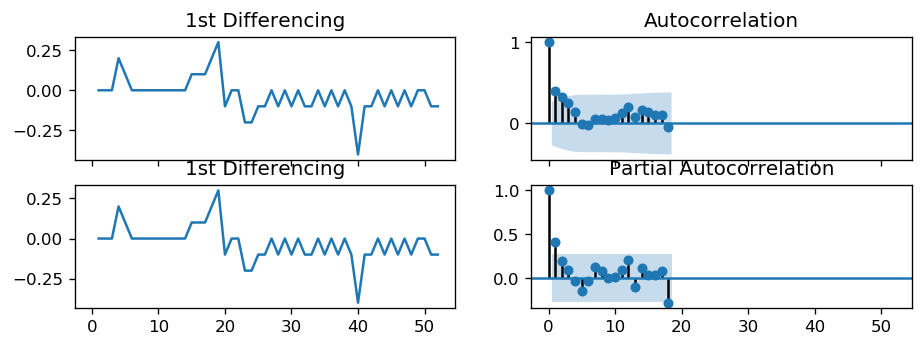

In [153]:
# Spain acf 
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0,0].plot(df1['Spain'].diff()); axes[0,0].set_title('1st Differencing')
plot_acf(df1['Spain'].diff().dropna(), ax=axes[0,1])

# Spain pacf
axes[1,0].plot(df1['Spain'].diff()); axes[1,0].set_title('1st Differencing')
plot_pacf(df1['Spain'].diff().dropna(), ax=axes[1,1])

plt.show()

# hence p, q values for models
# p = 1; q = 1

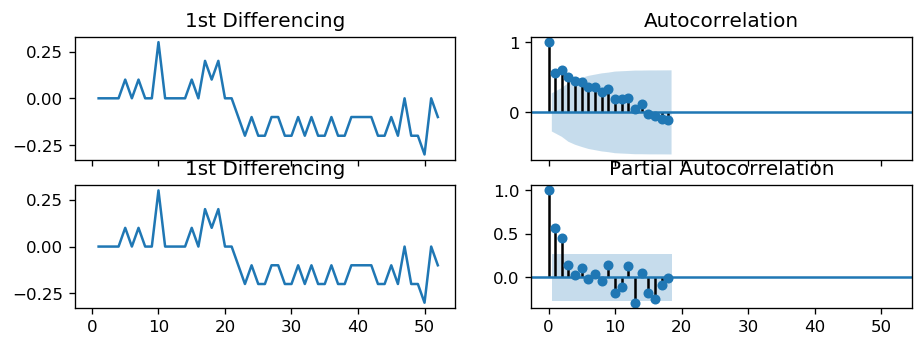

In [154]:
# France acf(q value)
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0,0].plot(df1['France'].diff()); axes[0,0].set_title('1st Differencing')
plot_acf(df1['France'].diff().dropna(), ax=axes[0,1])

# France pacf(p value)
axes[1,0].plot(df1['France'].diff()); axes[1,0].set_title('1st Differencing')
plot_pacf(df1['France'].diff().dropna(), ax=axes[1,1])

plt.show()

# hence p, q values for models
# p = 2; q = 2

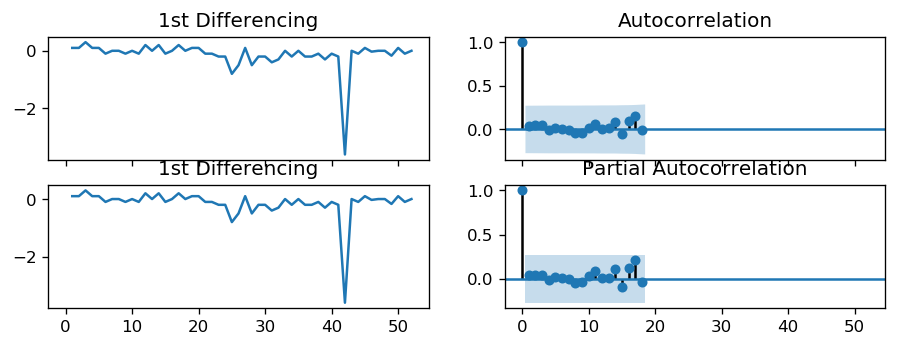

In [178]:
#pacf plot to get values of p,q for ARIMA model

# Australia acf 
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0,0].plot(df1['Australia'].diff()); axes[0,0].set_title('1st Differencing')
plot_acf(df1['Australia'].diff().dropna(), ax=axes[0,1])

# Australia pacf
axes[1,0].plot(df1['Australia'].diff()); axes[1,0].set_title('1st Differencing')
plot_pacf(df1['Australia'].diff().dropna(), ax=axes[1,1])

plt.show()

# hence p, q values for models
# p = 0; q = 0 #random walk

### ARIMA model 

In [158]:
# China forecast of hospital beds until 2020
from statsmodels.tsa.arima_model import ARIMA

# 1,1,1(p, d, q) ARIMA Model
model = ARIMA(df1['China'].dropna(), order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.China   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -4.354
Method:                       css-mle   S.D. of innovations              0.260
Date:                Sun, 05 Apr 2020   AIC                             16.709
Time:                        01:13:25   BIC                             24.513
Sample:                             1   HQIC                            19.701
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0581      0.037      1.549      0.128      -0.015       0.132
ar.L1.D.China    -0.9262      0.074    -12.456      0.000      -1.072      -0.780
ma.L1.D.China     1.0000        nan     

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [165]:
# Italy forecast of hospital beds until 2020

# 2,1,2(p, d, q) ARIMA Model for 
model = ARIMA(df1['Italy'].dropna(), order=(2, 1, 2))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:               D2.Italy   No. Observations:                   51
Model:                 ARIMA(2, 2, 2)   Log Likelihood                  22.063
Method:                       css-mle   S.D. of innovations              0.156
Date:                Sun, 05 Apr 2020   AIC                            -32.125
Time:                        01:22:38   BIC                            -20.534
Sample:                             2   HQIC                           -27.696
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0050      0.008     -0.657      0.514      -0.020       0.010
ar.L1.D2.Italy    -0.4504      0.553     -0.814      0.420      -1.535       0.634
ar.L2.D2.Italy     0.2460      0.354

In [170]:
# Spain forecast of hospital beds until 2020

# 1,1,1(p, d, q) ARIMA Model for 
model = ARIMA(df1['Spain'].dropna(), order=(1, 2, 1))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:               D2.Spain   No. Observations:                   51
Model:                 ARIMA(1, 2, 1)   Log Likelihood                  47.206
Method:                       css-mle   S.D. of innovations              0.093
Date:                Sun, 05 Apr 2020   AIC                            -86.412
Time:                        01:30:59   BIC                            -78.685
Sample:                             2   HQIC                           -83.459
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0030      0.001     -2.553      0.014      -0.005      -0.001
ar.L1.D2.Spain     0.2887      0.136      2.121      0.039       0.022       0.555
ma.L1.D2.Spain    -1.0000      0.060

In [174]:
# France forecast of hospital beds until 2020

# 2,1,2(p, d, q) ARIMA Model for 
model = ARIMA(df1['France'].dropna(), order=(2, 1, 2))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:               D.France   No. Observations:                   52
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  50.329
Method:                       css-mle   S.D. of innovations              0.091
Date:                Sun, 05 Apr 2020   AIC                            -88.658
Time:                        01:33:17   BIC                            -76.951
Sample:                             1   HQIC                           -84.170
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0628      0.053     -1.190      0.240      -0.166       0.041
ar.L1.D.France     0.4885      0.556      0.878      0.384      -0.601       1.578
ar.L2.D.France     0.3722      0.517

In [180]:
# Australia forecast of hospital beds until 2020

# 2,1,2(p, d, q) ARIMA Model for 
model = ARIMA(df1['Australia'].dropna(), order=(0, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Australia   No. Observations:                   52
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -39.921
Method:                           css   S.D. of innovations              0.521
Date:                Sun, 05 Apr 2020   AIC                             83.841
Time:                        02:04:02   BIC                             87.744
Sample:                             1   HQIC                            85.337
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1423      0.072     -1.968      0.054      -0.284      -0.001


### Forecasting 

In [189]:
# Create Training and Test
train1 = df1['Spain'][:45]
test1 = df1['Spain'][45:]

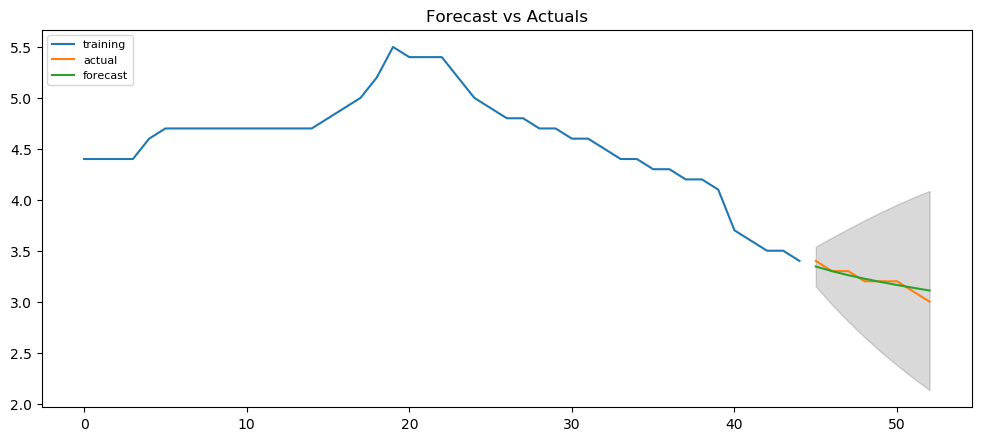

In [196]:
# Build Model
model1 = ARIMA(train1, order=(1, 1, 1))  
fitted = model1.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(8, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test1.index)
lower_series = pd.Series(conf[:, 0], index=test1.index)
upper_series = pd.Series(conf[:, 1], index=test1.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [202]:
# Forecast
n_periods = 10
df1['Year'] = pd.to_datetime(df1['Year'], format= '%Y')
fc, confint = model1.predict(start=2012, end=2021, params=)
index_of_fc = np.arange(len(df['Spain']), len(df['Spain'])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Spain Hospital Beds")
plt.show()

TypeError: predict() missing 1 required positional argument: 'params'

In [ ]:
## Assumptions of hospital beds per 1000 people
#(From df1)

# australia - 3.8
# China - 4.2
# Spain - 3
# Italy - 3.4
# france - 6.5
# USA - 3

## Building time series model(Covid-19 and beds)

### Finding ARIMA model parameters

In [262]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.preprocessing import StandardScaler

#checking for UnitedStates
result = adfuller(df2['Cm_cases'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# we see that the p-value is greater than 0.05 and hence we difference the time series data

ADF Statistic: -2.356020
p-value: 0.154536


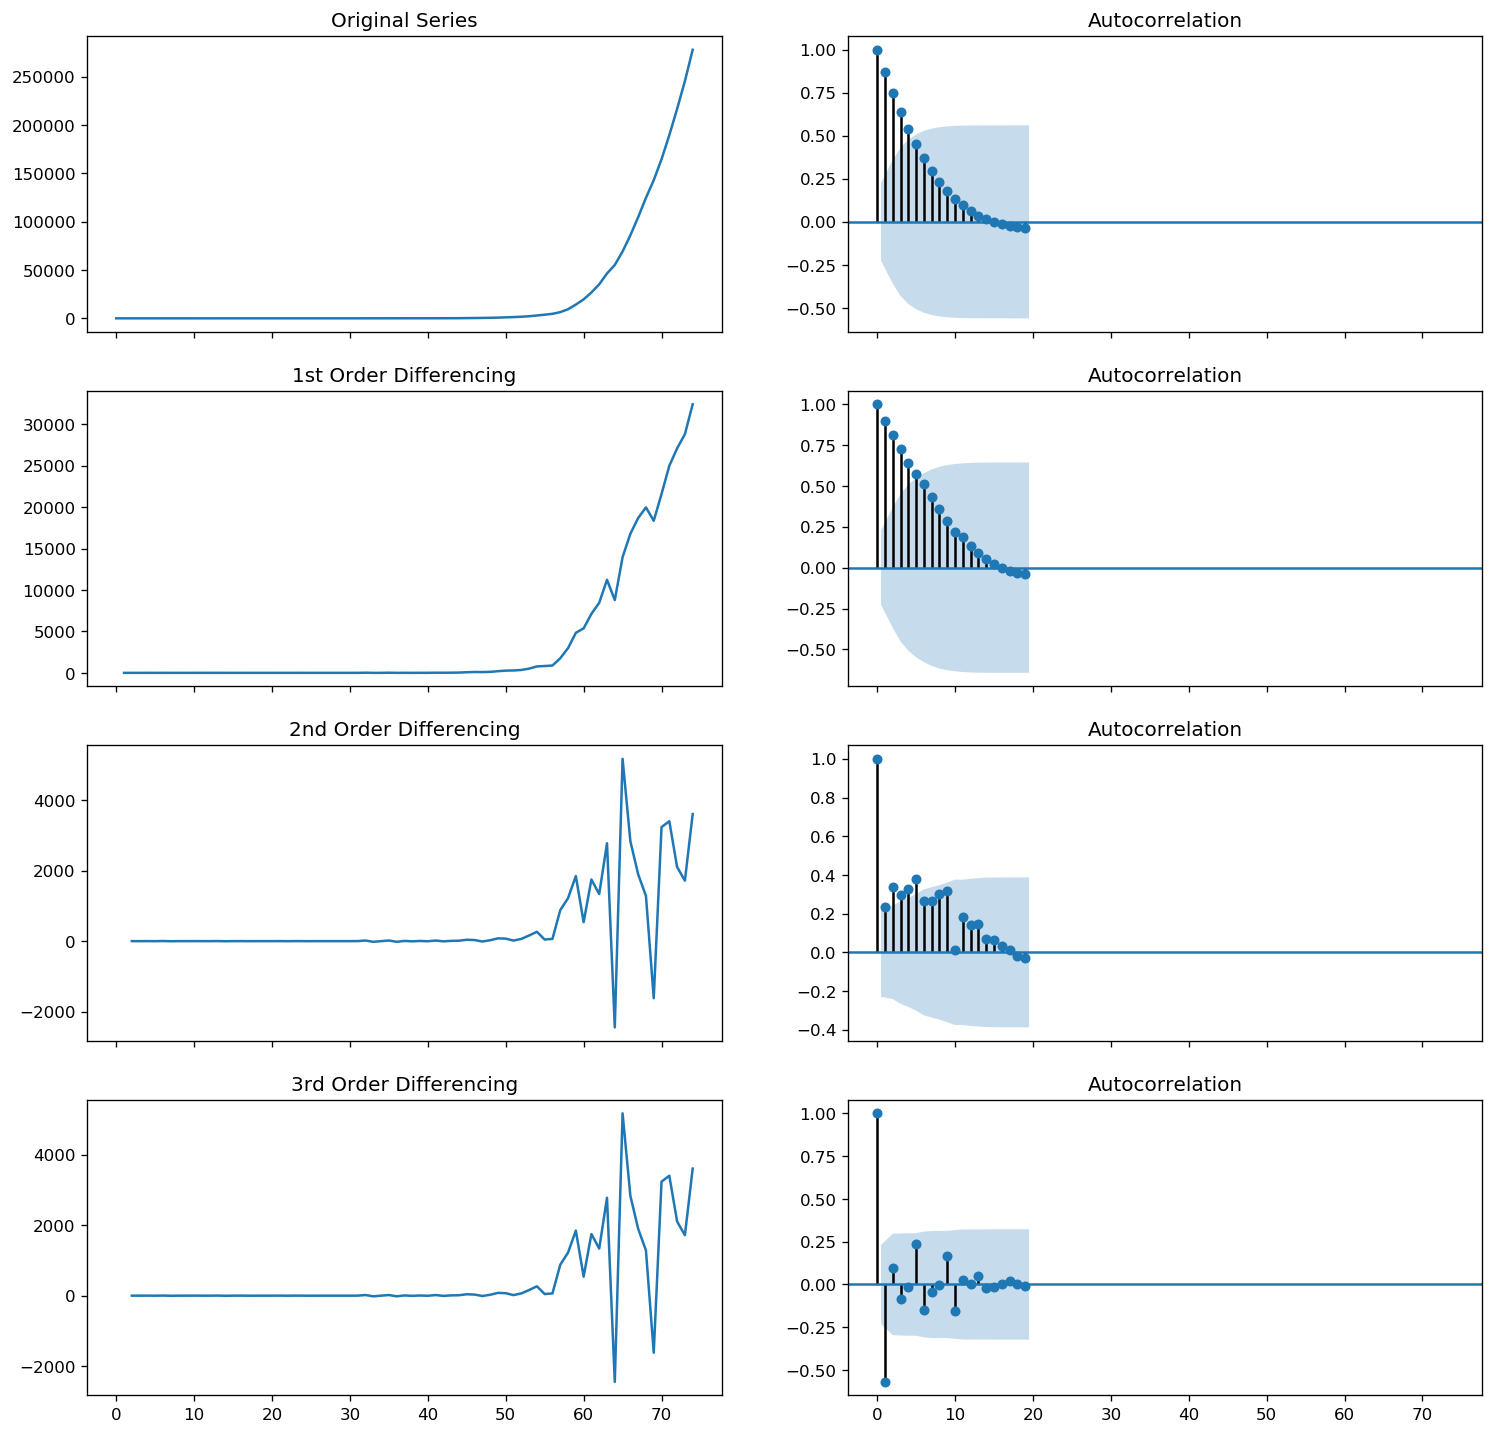

In [266]:
plt.rcParams.update({'figure.figsize':(15,15), 'figure.dpi':120})
# differencing USA cases

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df2['Cm_cases']); axes[0, 0].set_title('Original Series')
plot_acf(df2['Cm_cases'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df2['Cm_cases'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df2['Cm_cases'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df2['Cm_cases'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df2['Cm_cases'].diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(df2['Cm_cases'].diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df2['Cm_cases'].diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

# difference - 2 -(d value)

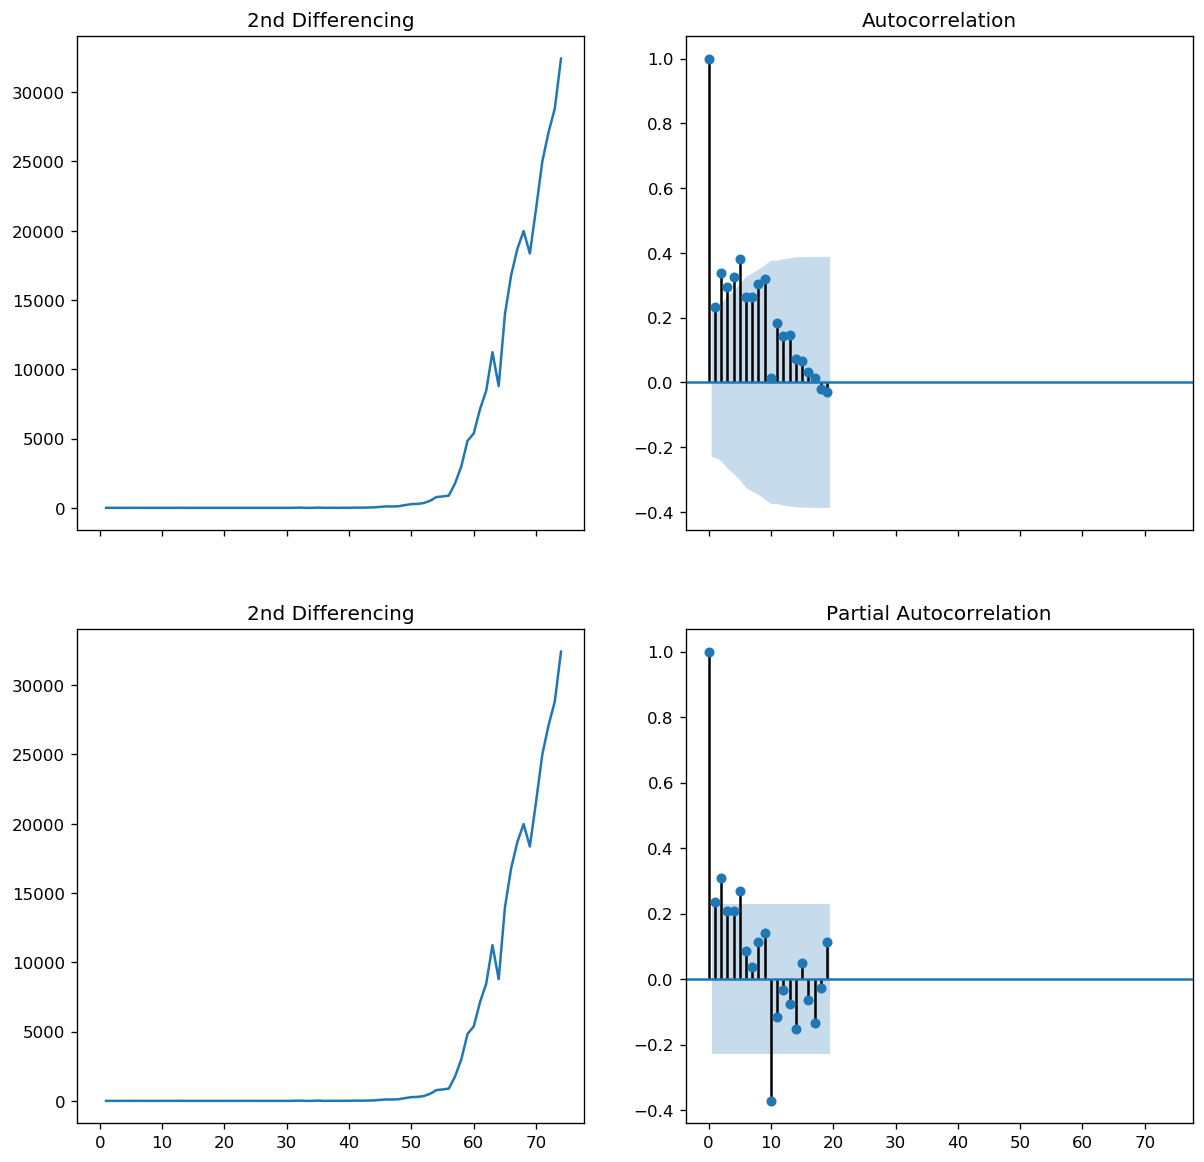

In [268]:
from statsmodels.tsa.arima_model import ARIMA
plt.rcParams.update({'figure.figsize':(12,12), 'figure.dpi':120})

#pacf plot to get values of p,q for ARIMA model

# China acf 
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0,0].plot(df2['Cm_cases'].diff()); axes[0,0].set_title('2nd Differencing')
plot_acf(df2['Cm_cases'].diff().diff().dropna(), ax=axes[0,1])

# China pacf
axes[1,0].plot(df2['Cm_cases'].diff()); axes[1,0].set_title('2nd Differencing')
plot_pacf(df2['Cm_cases'].diff().diff().dropna(), ax=axes[1,1])

plt.show()

# hence p, q values for models
# p = 2; q = 2 or 1

### Building ARIMA model

In [350]:

# Create Training and Test

train1 = df2['Cm_cases'][:70]
test1 = df2['Cm_cases'][70:]

In [351]:
len(df2['Cm_cases'])
beds_2020 = np.mean(df2['beds'])
print(beds_2020)

df2['date']=pd.to_datetime(df2['dateRep'], format='%m/%d/%Y')
df2.set_index(['dateRep'], inplace=True)


981502.0


In [352]:
df2.min()


day                                               1
month                                             1
year                                           2020
cases                                             0
Cm_cases                                          1
deaths                                            0
countriesAndTerritories    United_States_of_America
geoId                                            US
countryterritoryCode                            USA
popData2018                               327167434
beds                                         981502
date                            2020-01-21 00:00:00
dtype: object

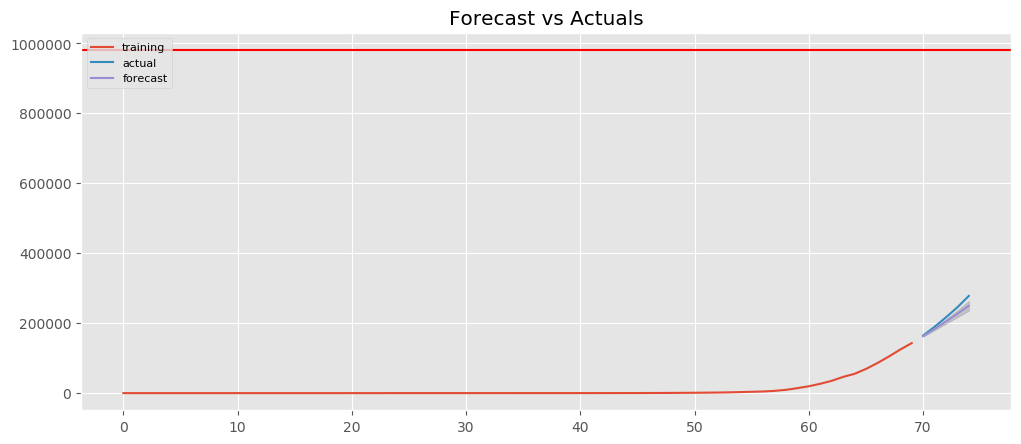

In [353]:
# 2,1,1(p, d, q) ARIMA Model

# Build Model
model1 = ARIMA(train1, order=(2,2,1))  
fitted = model1.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(5, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test1.index)
lower_series = pd.Series(conf[:, 0], index=test1.index)
upper_series = pd.Series(conf[:, 1], index=test1.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.axhline(y = beds_2020, color = 'red')
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [355]:
n_periods = 61
fc = model.predict(start=df2['Cm_cases']['4/4/2020'], end=df2['Cm_cases']['6/4/2020'], params = df2['date'])
index_of_fc = np.arange(len(df2), len(df2)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df2['Cm_cases'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

KeyError: '6/4/2020'

In [288]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

In [289]:
# model info
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [314]:

warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [317]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 351.6254984415302 for model SARIMAX(3, 1, 0)x(3, 1, 1, 12)


In [342]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train1,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

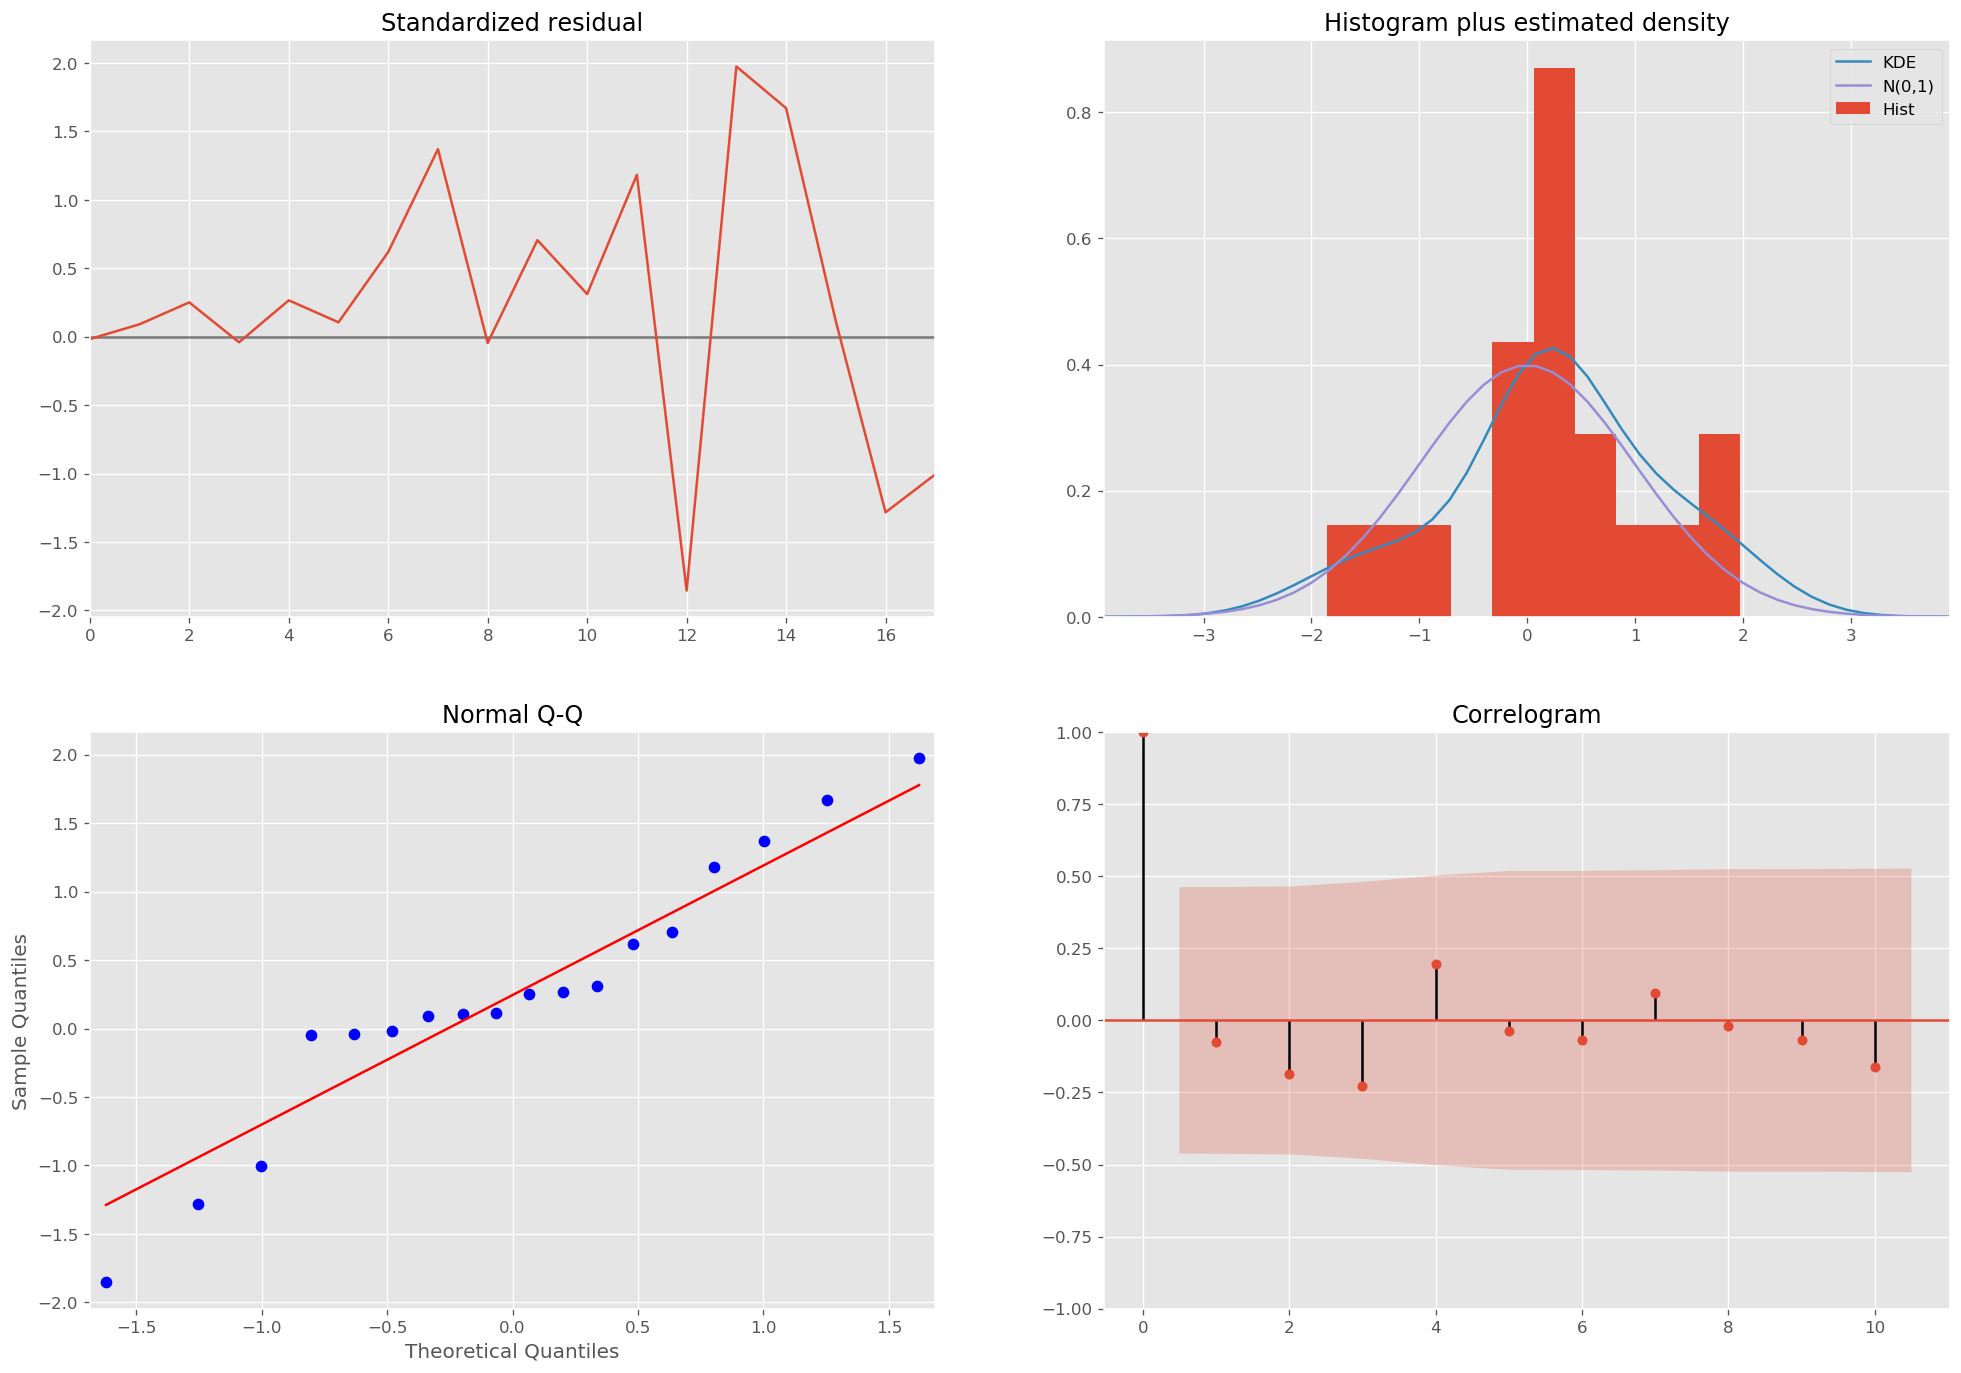

In [343]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()


In [344]:
pred0 = results.get_prediction(start='3/20/2020', dynamic=False)
pred0_ci = pred0.conf_int()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [345]:
pred1 = results.get_prediction(start='3/20/2020', dynamic=True)
pred1_ci = pred1.conf_int()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [346]:

pred2 = results.get_forecast('5/1/2020')
pred2_ci = pred2.conf_int()

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

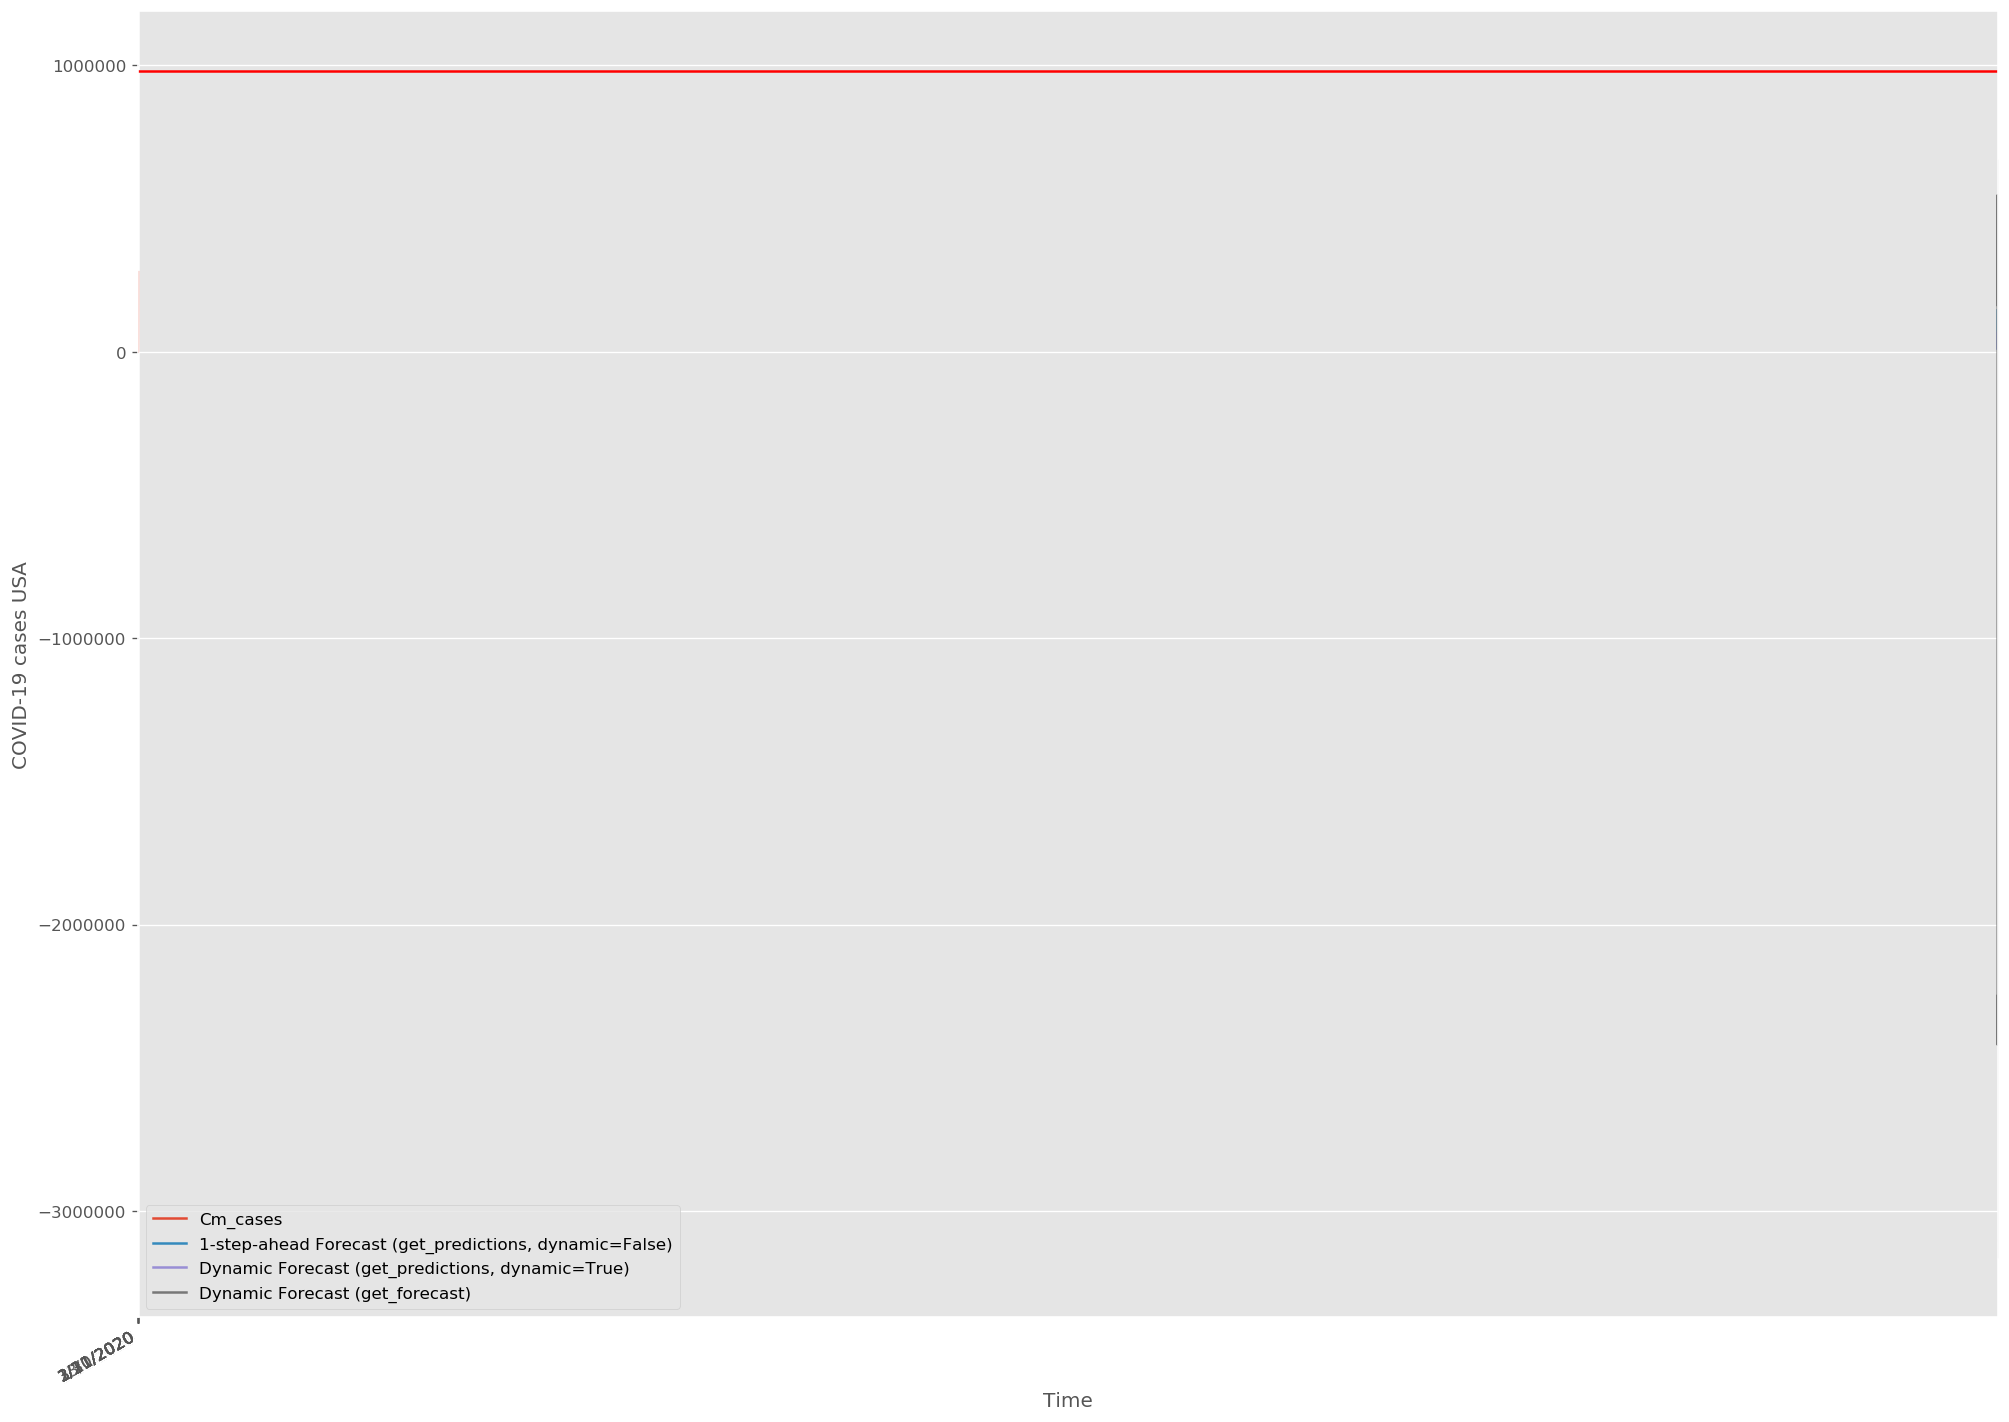

In [347]:
ax = df2['Cm_cases'].plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('COVID-19 cases USA')
plt.xlabel('Time')
plt.axhline(y = beds_2020, color = 'red')
plt.legend()
plt.show()

## Visualization in Plotly

In [203]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=43ee6e8ec5f064016f379ecb718ce5f421acd6e8025ea9a3eb6a0ae50d3098f4
  Stored in directory: C:\Users\Prashita\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [209]:
import plotly.express as px

In [210]:
gapminder = px.data.gapminder()
fig = px.scatter(df2[''], x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

In [205]:
!pip install chart_studio

In [207]:
import chart_studio
username = 'prashita21'
api_key = '5tH5k996KRlqFbMw51jH' 

chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [211]:
import chart_studio.plotly as py
py.plot(fig, filename = 'gdp_per_cap', auto_open=True)

'https://plotly.com/~prashita21/1/'